In [1]:
import tensorflow as tf
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.11.0'

In [11]:
train_datagen=ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,rescale=1/255,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('Dataset/training_set',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 8000 images belonging to 2 classes.


In [12]:
test_datagen=ImageDataGenerator(rescale=1/255)
test_set=test_datagen.flow_from_directory('Dataset/test_set',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU,Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [14]:
cnn=Sequential()

## convolution

In [16]:
cnn.add(Conv2D(kernel_size=3,filters=32,activation='relu',input_shape=[64,64,3]))

## polling

In [18]:
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))

## 2nd convolution&pooling

In [19]:
cnn.add(Conv2D(kernel_size=3,filters=32,activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))

## Flattening

In [21]:
cnn.add(Flatten())

## Full connection

In [22]:
cnn.add(Dense(units=128,activation='relu'))

## Output Layer

In [24]:
cnn.add(Dense(units=1,activation='sigmoid'))

## compile

In [26]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

In [25]:
cnn.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
model=cnn.fit(x=training_set,validation_data=test_set,epochs=30)

Epoch 1/30
250/250 [==============================] - 100s 394ms/step - loss: 0.6829 - accuracy: 0.5577 - val_loss: 0.6176 - val_accuracy: 0.6670
Epoch 2/30
250/250 [==============================] - 34s 137ms/step - loss: 0.6077 - accuracy: 0.6696 - val_loss: 0.5688 - val_accuracy: 0.7040
Epoch 3/30
250/250 [==============================] - 34s 137ms/step - loss: 0.5536 - accuracy: 0.7144 - val_loss: 0.5378 - val_accuracy: 0.7380
Epoch 4/30
250/250 [==============================] - 34s 138ms/step - loss: 0.5188 - accuracy: 0.7448 - val_loss: 0.4918 - val_accuracy: 0.7625
Epoch 5/30
250/250 [==============================] - 34s 137ms/step - loss: 0.4897 - accuracy: 0.7624 - val_loss: 0.4869 - val_accuracy: 0.7720
Epoch 6/30
250/250 [==============================] - 35s 138ms/step - loss: 0.4797 - accuracy: 0.7704 - val_loss: 0.4886 - val_accuracy: 0.7690
Epoch 7/30
250/250 [==============================] - 34s 137ms/step - loss: 0.4720 - accuracy: 0.7763 - val_loss: 0.5441 - val_a

In [28]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

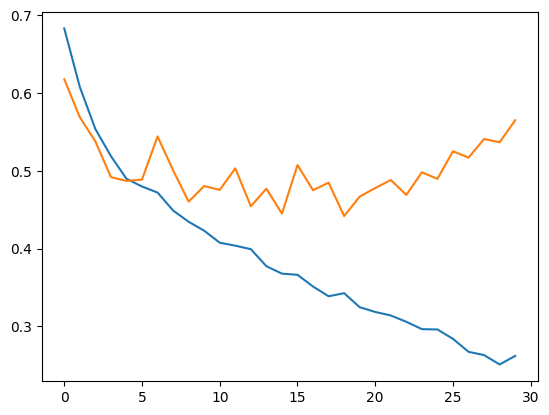

In [30]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])

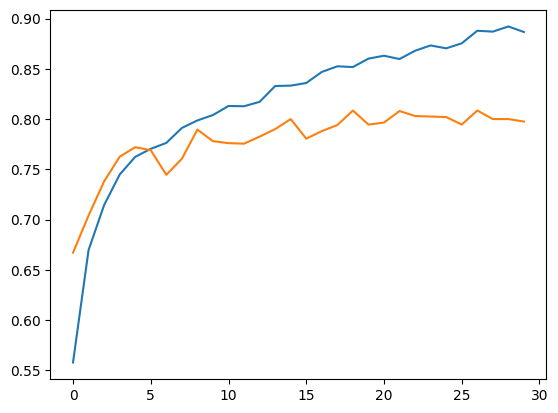

In [31]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])

In [32]:
from tensorflow.keras.preprocessing import image

In [54]:
load_image=image.load_img('./Dataset/cat.jpg',target_size=(64,64))
load_image_array=image.img_to_array(load_image)
test_image=np.expand_dims(load_image_array,axis=0)

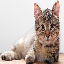

In [56]:
load_image

In [57]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [58]:
result=cnn.predict(test_image)
if result[0][0]<0.5:
    print('It is cat')
else:
    print('It is dog')
        

1/1 [==============================] - 0s 40ms/step
It is cat


In [59]:
load_image=image.load_img('./Dataset/dog.jfif',target_size=(64,64))
load_image_array=image.img_to_array(load_image)
test_image=np.expand_dims(load_image_array,axis=0)

In [60]:
result=cnn.predict(test_image)
if result[0][0]<0.5:
    print('It is cat')
else:
    print('It is dog')
        

1/1 [==============================] - 0s 41ms/step
It is dog
